In [24]:
# ! pip install torch_geometric

# Merging

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df_vids_gb = pd.read_csv("GBvideos.csv", on_bad_lines='skip')

In [27]:
df_vids_gb.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,apple events|apple event|iphone 8|iphone x|iph...,7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,this morning|interview|holly willoughby|philli...,494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,emmablackery|emma blackery|emma|blackery|briti...,142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,sprinkleofglitter|sprinkle of glitter|baby gli...,40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09


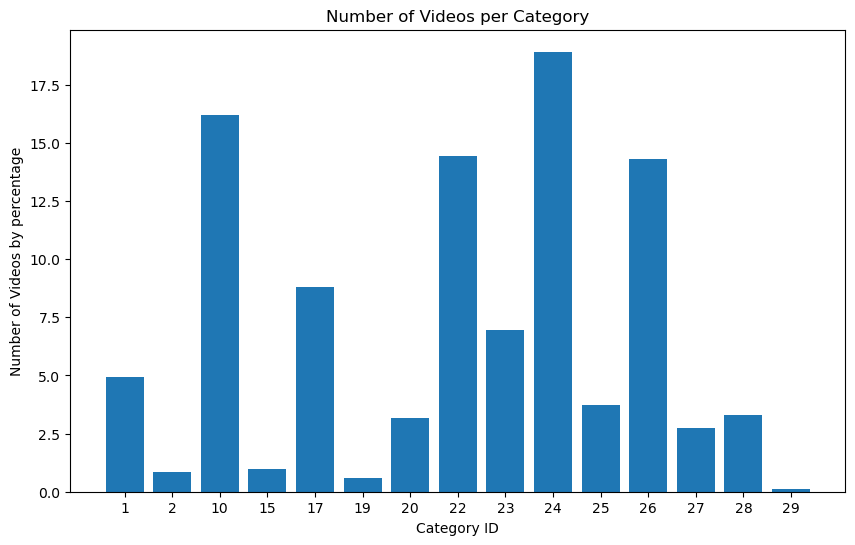

In [28]:
category_counts = df_vids_gb.groupby('category_id')['video_id'].count().reset_index(name='video_count')
total_videos = category_counts['video_count'].sum()
category_counts['percentage'] = (category_counts['video_count'] / total_videos) * 100
plt.figure(figsize=(10, 6))
plt.bar(category_counts['category_id'].astype(str), category_counts['percentage'])
plt.xlabel('Category ID')
plt.ylabel('Number of Videos by percentage')
plt.title('Number of Videos per Category')
plt.show()

In [29]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
import json

In [31]:
with open("GB_category_id.json", 'r') as file:
    cat_names = json.load(file)

In [32]:
titles = [item['snippet']['title'] for item in cat_names['items']]

print(titles)

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [33]:
df_vids_gb['tags'] = df_vids_gb['tags'].str.split('|')

In [34]:
df_vids_gb

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",7426393,78240,13548,705,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,13.09
1,AqokkXoa7uE,Holly and Phillip Meet Samantha the Sex Robot ...,This Morning,24,"[this morning, interview, holly willoughby, ph...",494203,2651,1309,0,https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg,13.09
2,YPVcg45W0z4,My DNA Test Results! I'm WHAT?!,emmablackery,24,"[emmablackery, emma blackery, emma, blackery, ...",142819,13119,151,1141,https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg,13.09
3,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,"[skit, korean, language, conversation, esl, ja...",1580028,65729,1529,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
4,NsjsmgmbCfc,Baby Name Challenge!,Sprinkleofglitter,26,"[sprinkleofglitter, sprinkle of glitter, baby ...",40592,5019,57,490,https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7988,T2RUYYs8Hxc,DJ Cummerbund - Hey Trump!,DJ Cummerbund,10,"[eminem, freestyle, bet, rage against the mach...",118453,1846,92,240,https://i.ytimg.com/vi/T2RUYYs8Hxc/default.jpg,22.10
7989,KkQdnJK1iF8,Emotional Groom Start Crying When He Sees Brid...,Today`s Video,22,"[Today's Video, Today Video, Latest News, Last...",76096,194,19,31,https://i.ytimg.com/vi/KkQdnJK1iF8/default.jpg,22.10
7990,1zOPtQNChZM,FALLING IN LOVE WITH SANTORINI,Estée Lalonde,22,"[essiebutton, Estée Lalonde, Estee Lalonde, Es...",170003,6592,127,454,https://i.ytimg.com/vi/1zOPtQNChZM/default.jpg,22.10
7991,Z7R8XRKqHAI,Hey Ya! - Walk off the Earth (Outkast Cover),Walk off the Earth,10,"[hey ya cover, amazing cover, Shape of You Wal...",893125,44811,652,2056,https://i.ytimg.com/vi/Z7R8XRKqHAI/default.jpg,22.10


Word CLoud for all tags from all the trending videos from Great Britain

In [35]:
# all_tags_list = sum(df_vids_gb['tags'], [])

# # Convert the list of tags into a single string with spaces
# all_tags_string = ' '.join(all_tags_list)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags_string)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [36]:
df_vids_gb_sorted = df_vids_gb.sort_values(by=['video_id', 'comment_total'], ascending=[True, False])

In [37]:
df_vids_gb_unique = df_vids_gb_sorted.drop_duplicates(subset='video_id', keep='first')

In [38]:
df_vids_gb_unique.shape

(1736, 11)

In [39]:
df_vids_gb_unique_sorted = df_vids_gb_unique.sort_values(by='views', ascending=False)
top_10_percent_count = int(np.ceil(len(df_vids_gb_unique_sorted) * 0.1))
top_10_percent_videos = df_vids_gb_unique_sorted.head(top_10_percent_count)

In [40]:
top_10_percent_videos

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
2767,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,"[BIGHIT, 빅히트, 방탄소년단, BTS, BANGTAN, 방탄]",58961407,2289911,96258,813322,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,26.09
592,QeaumjX9DNY,Yandel - Como Antes (Official Video) ft. Wisin,YandelVEVO,10,"[Wisinyyandel, wisin&yandel, yandelywisin, yan...",42486342,678389,13995,48429,https://i.ytimg.com/vi/QeaumjX9DNY/default.jpg,15.09
572,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,"[Dusk Till Dawn, Pop, RCA Records Label, ZAYN ...",41959549,1502097,30036,104931,https://i.ytimg.com/vi/tt2k8PGm-TI/default.jpg,15.09
2189,SHq2qrFUlGY,Shakira - Perro Fiel (Official Video) ft. Nick...,shakiraVEVO,10,"[Shakira ft. Nicky Jam, Shakira ft. Nicky Jam ...",38144440,624008,47220,41131,https://i.ytimg.com/vi/SHq2qrFUlGY/default.jpg,23.09
7284,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,"[BET, BET Networks, BET Music, Black Entertain...",33696905,993408,186722,340869,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,19.10
...,...,...,...,...,...,...,...,...,...,...,...
7952,TYR_7CeO39E,Sexiest Male Vocalist Riff-Off w/ Usher & Luke...,The Late Late Show with James Corden,24,"[James Corden, The Late Late Show, Colbert, la...",2183926,47301,1148,3104,https://i.ytimg.com/vi/TYR_7CeO39E/default.jpg,22.10
4532,QlRWZuKPVoo,Era Istrefi - No I Love Yous feat. French Mont...,Ultra Music,10,"[ultra records, ultra music, ultrarecords, ult...",2177949,34459,2274,2854,https://i.ytimg.com/vi/QlRWZuKPVoo/default.jpg,5.10
653,xHvVhhFvLtY,SPIKED by a Sea Urchin?,Brave Wilderness,15,"[sting, stung, stinging, adventure, adventurou...",2161849,45013,917,7757,https://i.ytimg.com/vi/xHvVhhFvLtY/default.jpg,16.09
5132,8hP6WROycAU,One More Light (Official Lyric Video) - Linkin...,Linkin Park,10,"[Linkin Park, One More Light, Lyrics, Lyric Vi...",2138277,172365,1195,11752,https://i.ytimg.com/vi/8hP6WROycAU/default.jpg,8.10


Top Tags based on views ( top 10%) Great Britain

In [41]:
# tags_list = sum(top_10_percent_videos['tags'], [])

# # Convert the list of tags into a single string with spaces
# tags_string = ' '.join(tags_list)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_string)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [42]:
# bottom_10_percent_count = int(np.ceil(len(df_vids_gb_unique_sorted) * 0.1))
# bottom_10_percent_videos = df_vids_gb_unique_sorted.tail(bottom_10_percent_count)

# tags_list_bottom = sum(bottom_10_percent_videos['tags'], [])

# # Convert the list of tags into a single string with spaces
# tags_string_bottom = ' '.join(tags_list_bottom)

# # Generating the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_string_bottom)

# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [43]:
# from textblob import TextBlob

In [44]:
# df_comments_gb = pd.read_csv("GBcomments.csv", error_bad_lines=False)
df_comments_gb = pd.read_csv("GBcomments.csv", on_bad_lines='skip')

In [45]:
df_comments_gb.shape

(718452, 4)

In [46]:
df_comments_gb.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [47]:
import pandas as pd
# from textblob import TextBlob
import re

def clean_text(text):
    """Remove special characters, numbers, and other unnecessary parts from the text."""
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)
    # text = re.sub(r'[^a-zA-Z\s\.\,\!\?\:\;\'\"]', '', text)  # Keep only letters and spaces

    text = re.sub(r'[^\x00-\x7F]+', '', text)         # ascii

    text = text.replace('\\n', ' ')
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip().lower()

df_comments_gb['cleaned_comment_text'] = df_comments_gb['comment_text'].apply(clean_text)

# def categorize_sentiment(text):
#     """Analyze sentiment of the text and categorize as positive, negative, or neutral."""
#     analysis = TextBlob(text)
#     if analysis.sentiment.polarity > 0:
#         return 'Positive'
#     elif analysis.sentiment.polarity < 0:
#         return 'Negative'
#     else:
#         return 'Neutral'

# Applying sentiment analysis
# df_comments_gb['sentiment'] = df_comments_gb['cleaned_comment_text'].apply(categorize_sentiment)

# Counting the number of positive, negative, and neutral comments
# sentiment_counts = df_comments_gb['sentiment'].value_counts()

# print(sentiment_counts)

In [48]:
df_comments_gb.head()

,video_id,comment_text,likes,replies,cleaned_comment_text
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,it's more accurate to call it the m+ (1000) be...
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,to be there with a samsung phone
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,"thank gosh, a place i can watch it without hav..."
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,what happened to the home button on the iphone...
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power is the disease. care is the cure. keep c...


In [49]:
max_comments = df_vids_gb.loc[df_vids_gb.groupby('video_id')['comment_total'].idxmax()]
# print(max_comments)

In [50]:
print(type(max_comments))

<class 'pandas.core.frame.DataFrame'>


In [51]:
merged_df = pd.merge(df_comments_gb, max_comments, on='video_id', how='inner')

merged_df

,video_id,comment_text,likes_x,replies,cleaned_comment_text,title,channel_title,category_id,tags,views,likes_y,dislikes,comment_total,thumbnail_link,date
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,it's more accurate to call it the m+ (1000) be...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,to be there with a samsung phone,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,"thank gosh, a place i can watch it without hav...",Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,what happened to the home button on the iphone...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,power is the disease. care is the cure. keep c...,Live Apple Event - Apple September Event 2017 ...,Apple Event,28,"[apple events, apple event, iphone 8, iphone x...",8443106,86006,15504,2381,https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718447,XQFeShp6UIY,Exploit used = Not World‘s First. Simple.,2,2,exploit used = not worlds first. simple.,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718448,XQFeShp6UIY,Some exotics in Destiny have hidden perks. The...,3,4,some exotics in destiny have hidden perks. the...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718449,XQFeShp6UIY,Why is there a race if it's literally the same...,1,3,why is there a race if it's literally the same...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10
718450,XQFeShp6UIY,Who the fuck cares about some stupid heavy gli...,0,2,who the fuck cares about some stupid heavy gli...,World's First Prestige Leviathan Raid Completi...,Gladd,20,"[destiny, destiny 2, destiny 2 leviathan raid,...",19035,340,157,284,https://i.ytimg.com/vi/XQFeShp6UIY/default.jpg,22.10


In [52]:
merged_df.shape

merged_df.to_csv('merged_GB.csv')

In [53]:
import pandas as pd
import re
import torch
import torch.nn as nn
from torch_geometric.utils import to_networkx
from transformers import AutoModel, AutoTokenizer
from torch_geometric.nn import RGCNConv
from torch_geometric.data import Data
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocessing

In [54]:
# replace file name with the merged file you got from running Varad's notbook
filename = 'merged_GB.csv'
merged_df = pd.read_csv(filename,on_bad_lines='skip')

In [55]:
grouped_df = merged_df.sort_values(by='likes_x',ascending=False).groupby('video_id')
merged_df = merged_df.drop(['replies','thumbnail_link'],axis=1)

In [56]:
def parse_tags(tag_str: str) -> list:
    # split tags into list because the tags column is not in json format :(
    tags = re.sub(r"[\[\]]","",tag_str).split(',')

    # drop the single quotes
    tags = [tag[1:-1] for tag in tags]

    return tags

In [57]:
video_nodes = []
prediction_nodes = []

y = None

for video_id, data in grouped_df:
    curr_video_nodes = []
    curr_prediction_nodes = []

    # these are put into seperate file because these are predictions
    for col, val in data[['likes_y','dislikes','views']].iloc[0].items():
        curr_prediction_nodes.append((val,col,video_id))

    # data = data.drop(['likes_y','dislikes','views'],axis=1)

    # append nodes
    for col, val in data.iloc[0].drop(['video_id','likes_x','tags','date']).items():
        curr_video_nodes.append((val,col,video_id))

    # append comment nodes
    # print(data.columns)
    for comment in data['cleaned_comment_text']:
        curr_video_nodes.append((comment,'cleaned_comment_text',video_id))

    # load tags as array and append as nodes
    tags = parse_tags(data['tags'].iloc[0])

    for tag in tags:
        if tag[0] == "'":
            tag = tag[1:]
        curr_video_nodes.append((tag,'tags',video_id))
    # raise

    video_nodes.append(curr_video_nodes)
    prediction_nodes.append(curr_prediction_nodes)

video_df = pd.DataFrame(video_nodes)
prediction_df = pd.DataFrame(prediction_nodes)
video_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235
0,"(700812, Unnamed: 0, --JinobXWPk)",(Coyote: LOOK OUT LOOK OUT LOOK OUT \nMe: GET ...,"(0, replies, --JinobXWPk)",(coyote: look out look out look out me: get aw...,"(DANGEROUS Jungle Spider!, title, --JinobXWPk)","(Brave Wilderness, channel_title, --JinobXWPk)","(15, category_id, --JinobXWPk)","(1709248, views, --JinobXWPk)","(44999, likes_y, --JinobXWPk)","(627, dislikes, --JinobXWPk)",...,None,None,None,None,None,None,None,None,None,None
1,"(257489, Unnamed: 0, --y69Ui8xwM)","(The Giroud goal has to win it for me., commen...","(9, replies, --y69Ui8xwM)","(the giroud goal has to win it for me., cleane...","(FIFA Puskás Award 2017 - ALL NOMINEES, title,...","(LilWiz, channel_title, --y69Ui8xwM)","(17, category_id, --y69Ui8xwM)","(46479, views, --y69Ui8xwM)","(408, likes_y, --y69Ui8xwM)","(19, dislikes, --y69Ui8xwM)",...,None,None,None,None,None,None,None,None,None,None
2,"(51057, Unnamed: 0, -1fzGnFwz9M)",(I make interesting cartoons and I need your h...,"(5, replies, -1fzGnFwz9M)",(i make interesting cartoons and i need your h...,(9 Things You Need To Know About Kittens - Sim...,"(Simon's Cat, channel_title, -1fzGnFwz9M)","(15, category_id, -1fzGnFwz9M)","(197531, views, -1fzGnFwz9M)","(7176, likes_y, -1fzGnFwz9M)","(117, dislikes, -1fzGnFwz9M)",...,None,None,None,None,None,None,None,None,None,None
3,"(167539, Unnamed: 0, -2hRYEFiPSA)",(One thing that's upset me the most about Ches...,"(2, replies, -2hRYEFiPSA)",(one thing that's upset me the most about ches...,(Mike Shinoda of Linkin Park - KROQ Interview:...,"(LPAssociation, channel_title, -2hRYEFiPSA)","(10, category_id, -2hRYEFiPSA)","(149920, views, -2hRYEFiPSA)","(4766, likes_y, -2hRYEFiPSA)","(28, dislikes, -2hRYEFiPSA)",...,None,None,None,None,None,None,None,None,None,None
4,"(268113, Unnamed: 0, -6Zc8Co2H3w)","(Sub Rosa, the episode where Crusher masturbat...","(0, replies, -6Zc8Co2H3w)","(sub rosa, the episode where crusher masturbat...",(Honest Trailers - Star Trek: The Next Generat...,"(Screen Junkies, channel_title, -6Zc8Co2H3w)","(1, category_id, -6Zc8Co2H3w)","(1546160, views, -6Zc8Co2H3w)","(42954, likes_y, -6Zc8Co2H3w)","(1075, dislikes, -6Zc8Co2H3w)",...,None,None,None,None,None,None,None,None,None,None


# Graph Data

In [58]:
views = []
for i in prediction_df[[2]].values[:, 0][:]:
    views.append(i[0])


min_views, max_views = torch.tensor(views).min(), torch.tensor(views).max()

In [184]:


def make_data(video_links, min, max, threshold=None, for_show=False):

    x = []
    edge_index = []
    edge_type = []
    y = []

    super_node_index = 0
    x.append((0, 'super'))

    node_id = 1
    type_id = 0
    types_dict = {}

    valid_edge_types = [
                'cleaned_comment_text',
                'title',
                'channel_title',
                'category_id',
                'tags'
            ]

    node_types = dict(zip(valid_edge_types, ['text', 'text', 'channel', 'category', 'text']))

    count_0 = 0
    count_4 = 0

    for link in video_links:
        if link:
            source, edge, destination = link
            # print(source, edge, destination)
            if edge == 'views':

                y.append((source - min) / (max - min))
                # y.append(source)
            if edge not in valid_edge_types:
                continue

            if edge == 'cleaned_comment_text':
                count_0 += 1
                if threshold:
                  if count_0 > threshold:
                    continue
            if edge == 'tags' :
                count_4 += 1
                if threshold:
                  if count_4 > threshold:
                    continue

            edge_index.append([node_id, super_node_index])
            edge_index.append([super_node_index, node_id])
            node_id += 1

            x.append((source, node_types[edge]))
            try:
                edge_type.append(types_dict[edge])
                edge_type.append(types_dict[edge])
            except:
                types_dict[edge] = type_id
                type_id += 1

                edge_type.append(types_dict[edge])
                edge_type.append(types_dict[edge])
            # print(source, edge, destination)

    # x
    # torch.tensor(x).shape

    data = Data(x=x, edge_index=torch.tensor(edge_index).t(), edge_type=torch.tensor(edge_type), y=torch.tensor(y))
    # data.y = torch.log(data.y)
    if for_show:
        return data, types_dict
    else:
        return data
# edge_type
# x[-10:], edge_type[-10:],edge_index[-10:], types_dict

/home/mastaraan/anaconda3/envs/new/lib/python3.11/site-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index', 'edge_type', 'y', 'x'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


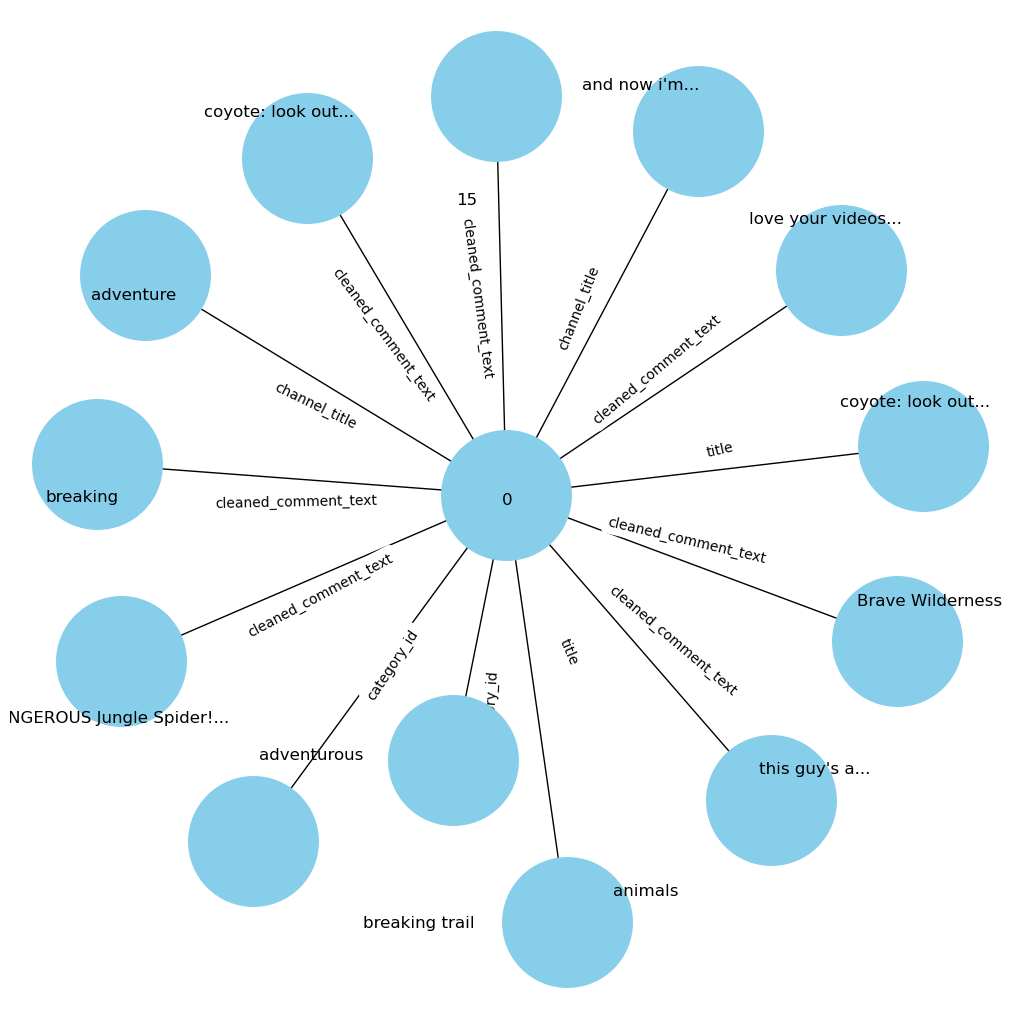

In [60]:
plt.gcf().set_size_inches(10, 10)

data, td = make_data(video_df.iloc[0], min_views, max_views, threshold=5, for_show=True)
td = {v: k for k, v in td.items()}
G = to_networkx(data, to_undirected=True)

for i, node_x in enumerate(data.x):
    if node_x[-1] == 'text':
        min_len = min(len(node_x[0].split(' ')), 3)
        if min_len < 3:
            add = ''
        else:
            add = '...'
        G.nodes[i]['label'] = ' '.join(node_x[0].split(' ')[:min_len]) + add
    else:
        G.nodes[i]['label'] = node_x[0]

for i, (u, v) in enumerate(G.edges()):
    G[u][v]['label'] = td[data.edge_type[i].item()]


nx.draw(G, with_labels=False, node_color='skyblue', node_size=8700, edge_color='k')

pos = nx.spring_layout(G)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

# Naive

In [135]:
class Naive(nn.Module):
    def __init__(self, channel_id, num_categories, ff_dims, dropout, *args, **kwargs) -> None:
        super(Naive, self).__init__(*args, **kwargs)

        # self.num_relations = num_relations
        # self.conv_dims = conv_dims
        self.ff_dims = ff_dims
        self.dropout_rate = dropout

        model_name = "prajjwal1/bert-tiny"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        self.embedding_size = 128
        self.channel_id = channel_id
        self.num_categories = num_categories

        self.channel_enc = nn.Embedding(len(self.channel_id.keys()), self.embedding_size)
        self.category_enc = nn.Embedding(num_categories, self.embedding_size)

        dims = [self.embedding_size]
        # self.conv = nn.ModuleList(
        #     [
        #         RGCNConv(
        #             dim, dims[i+1], self.num_relations
        #         )
        #         for i, dim in enumerate(dims[:-1])
        #     ]
        # )
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(self.dropout_rate)

        dims = dims + self.ff_dims
        self.ff = nn.ModuleList(
            [
                nn.Linear(
                    dim, dims[i + 1]
                )
                for i, dim in enumerate(dims[:-1])
            ]
        )

        self.bn = nn.ModuleList(
            [
                nn.BatchNorm1d(dim)
                for dim in dims
            ]
        )

        self.output_ff = nn.Linear(dims[-1], 1)

    @property
    def device(self):
        return next(self.parameters()).device

    def pre_encode(self, x):
        ret = []
        for i, node_x in enumerate(x):
            if node_x[-1] == 'text':
                inputs = self.tokenizer(
                    str(node_x[0]),
                    return_tensors="pt",
                    padding=True,
                    truncation=True,
                    max_length=512
                )
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                with torch.no_grad():
                    self.bert.eval()
                    encoded = self.bert(**inputs)
                ret.append(encoded.pooler_output.reshape(-1))
                # print(node_x)

            elif node_x[-1] == 'super':
                ret.append(torch.zeros(self.embedding_size).to(self.device))
            elif node_x[-1] == 'channel':
                t = torch.tensor(self.channel_id[node_x[0]]).long().to(self.device)
                ret.append(self.channel_enc(t))
            elif node_x[-1] == 'category':
                t = torch.tensor(node_x[0]).long().to(self.device)
                ret.append(self.category_enc(t))

        return torch.stack(ret).to(self.device)

    def forward(self, data):
        x = self.pre_encode(data.x).to(self.device)

        x = self.bn[0](x).sum(0).reshape(1, -1)
        # print(x.shape)

        # for conv, bn in zip(self.conv, self.bn[1: len(self.conv_dims) + 1]):
        #     residual = conv(x=x, edge_index=data.edge_index.to(self.device), edge_type=data.edge_type.to(self.device))

        #     residual = bn(residual)
        #     residual = self.activation(residual)
        #     residual = self.dropout(residual)

        #     try:
        #         x = x + residual
        #     except:
        #         x = residual

        for ff, bn in zip(self.ff, self.bn[1:]):
            residual = ff(x)
            # print(bn, residual.shape)
            # residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        x = self.output_ff(x)
        x = self.dropout(x)
        return x[0]


# GNN

In [134]:
class GNN(nn.Module):
    def __init__(self, num_relations, channel_id, num_categories, conv_dims, ff_dims, dropout, *args, **kwargs) -> None:
        super(GNN, self).__init__(*args, **kwargs)

        self.num_relations = num_relations
        self.conv_dims = conv_dims
        self.ff_dims = ff_dims
        self.dropout_rate = dropout

        model_name = "prajjwal1/bert-tiny"
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.bert = AutoModel.from_pretrained(model_name)
        self.embedding_size = 128
        self.channel_id = channel_id
        self.num_categories = num_categories

        self.channel_enc = nn.Embedding(len(self.channel_id.keys()), self.embedding_size)
        self.category_enc = nn.Embedding(num_categories, self.embedding_size)

        dims = [self.embedding_size] + self.conv_dims
        self.conv = nn.ModuleList(
            [
                RGCNConv(
                    dim, dims[i+1], self.num_relations
                )
                for i, dim in enumerate(dims[:-1])
            ]
        )
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(self.dropout_rate)

        dims = dims + self.ff_dims
        self.ff = nn.ModuleList(
            [
                nn.Linear(
                    dim, dims[i + len(self.conv_dims) + 1]
                )
                for i, dim in enumerate(dims[len(self.conv_dims):-1])
            ]
        )

        self.bn = nn.ModuleList(
            [
                nn.BatchNorm1d(dim)
                for dim in dims
            ]
        )

        self.output_ff = nn.Linear(dims[-1], 1)

    @property
    def device(self):
        return next(self.parameters()).device

    def pre_encode(self, x):
        ret = []
        for i, node_x in enumerate(x):
            if node_x[-1] == 'text':
                inputs = self.tokenizer(
                    str(node_x[0]),
                    return_tensors="pt",
                    padding=True,
                    truncation=True,
                    max_length=512
                )
                inputs = {k: v.to(self.device) for k, v in inputs.items()}
                with torch.no_grad():
                    self.bert.eval()
                    encoded = self.bert(**inputs)
                ret.append(encoded.pooler_output.reshape(-1))
                # print(node_x)

            elif node_x[-1] == 'super':
                ret.append(torch.zeros(self.embedding_size).to(self.device))
            elif node_x[-1] == 'channel':
                t = torch.tensor(self.channel_id[node_x[0]]).long().to(self.device)
                ret.append(self.channel_enc(t))
            elif node_x[-1] == 'category':
                t = torch.tensor(node_x[0]).long().to(self.device)
                ret.append(self.category_enc(t))

        return torch.stack(ret).to(self.device)

    def forward(self, data):
        x = self.pre_encode(data.x).to(self.device)

        x = self.bn[0](x)

        for conv, bn in zip(self.conv, self.bn[1: len(self.conv_dims) + 1]):
            residual = conv(x=x, edge_index=data.edge_index.to(self.device), edge_type=data.edge_type.to(self.device))

            residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        for ff, bn in zip(self.ff, self.bn[len(self.conv_dims) + 2:]):
            residual = ff(x)
            # print(bn, residual.shape)
            residual = bn(residual)
            residual = self.activation(residual)
            residual = self.dropout(residual)

            try:
                x = x + residual
            except:
                x = residual

        x = self.output_ff(x)
        x = self.dropout(x)
        return x[0]


In [63]:
def train(gnn, data, optimizer, loss_fn):
    gnn.train()

    optimizer.zero_grad()

    y_hat = gnn(data)

    # print(y_hat, data.y)
    # print('what we had')

    loss = loss_fn(y_hat, data.y.float())

    loss.backward()

    optimizer.step()

    return loss.item()


In [64]:
@torch.no_grad()
def eval(gnn, data, criterion):
    gnn.eval()

    y_hat = gnn(data)

    return criterion(y_hat, data.y.float()).item()


# Training/Testing


In [65]:
# len(data_list)

In [196]:
data_list = []
for video_links in video_df.iloc:
    data = make_data(video_links, min_views, max_views, threshold=50)
    data_list.append(data)

In [197]:
index = torch.randperm(len(data_list))
train_size = int(.8 * index.shape[0])

train_data = [data_list[i] for i in index[:train_size]]
test_data = [data_list[i] for i in index[train_size:]]

## Neural Naive (Pooling)

In [69]:
num_channels = pd.unique(merged_df['channel_title']).shape[0]
channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

num_categories = pd.unique(merged_df['category_id']).max() * 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

naive = Naive(channel_id, num_categories, [128, 128], 0.2).to(device)

# naive(data)

num_channels = pd.unique(merged_df['channel_title']).shape[0]
channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

num_categories = pd.unique(merged_df['category_id']).max() * 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# input_tensor = input_tensor.to(device)
# output_tensor = output_tensor.to(device)

# gnn = GNN(5, channel_id, num_categories, [84, 84], [128, 128], 0.2).to(device)

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(naive.parameters(), lr=1e-3)
# gnn.bn


for e in range(10):
    e_loss = 0
    error = 0
    for data in tqdm(train_data):

        data.y = data.y.to(device)
        e_loss += train(naive, data, optimizer, loss_fn) * (max_views - min_views) + min_views
    for data in tqdm(test_data):
        data.y = data.y.to(device)
        # error += eval(naive, data, loss_fn) * (max_views - min_views) + min_views
        if data.y:
            error += (eval(naive, data, loss_fn) * (max_views - min_views) + min_views) / (data.y * (max_views - min_views) + min_views)
    # error = eval(gnn, data, loss_fn)

    print(e + 1)
    print(e_loss / len(train_data))
    print(error / len(test_data))
    print('--------')


 18%|█▊        | 240/1353 [02:06<09:45,  1.90it/s]


KeyboardInterrupt: 

## Naive Bag-of-words

In [187]:
documents = []
for data in data_list:
    text = []
    for i, node_x in enumerate(data.x):
        if node_x[-1] == 'text' and isinstance(node_x[0], str):

            t = node_x[0]
            # print(t)
            t = re.sub(r'[^a-zA-Z\s]', '', t)  # Keep only letters and spaces

            text.extend(t.split())
    documents.append(' '.join(text))


In [188]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(documents)

X_array = X.toarray()


train_size = int(.8 * index.shape[0])

train_X = np.stack([X_array[i.item()] for i in index[:train_size]])
test_X = np.stack([X_array[i.item()] for i in index[train_size:]])

train_y = np.stack([data.y.cpu().numpy() for data in train_data])
test_y = np.stack([data.y.cpu().numpy() for data in test_data])


In [190]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_X, train_y)

i = test_y != 0
i = i.reshape(-1)
test_error_rate = (lin_reg.predict(test_X[i]) / test_y[i]).mean()

test_error_rate

7.298821955278142

## GNN

In [198]:
num_channels = pd.unique(merged_df['channel_title']).shape[0]
channel_id = dict(zip(pd.unique(merged_df['channel_title']), [i for i in range(num_channels)]))

num_categories = pd.unique(merged_df['category_id']).max() * 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# input_tensor = input_tensor.to(device)
# output_tensor = output_tensor.to(device)

gnn = GNN(5, channel_id, num_categories, [16, 16], [24, 24], 0.2).to(device)

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(gnn.parameters(), lr=5e-5)
# gnn.bn


for e in range(100):
    e_loss = 0
    error = 0
    for data in tqdm(train_data):

        data.y = data.y.to(device)
        e_loss += train(gnn, data, optimizer, loss_fn) * (max_views - min_views) + min_views
    for data in tqdm(test_data):
        data.y = data.y.to(device)
        # error += (eval(gnn, data, loss_fn) * (max_views - min_views) + min_views)
        if data.y:
            error += (eval(gnn, data, loss_fn) * (max_views - min_views) + min_views) / (data.y * (max_views - min_views) + min_views)
    # error = eval(gnn, data, loss_fn)

    print(f'Epoch: {e + 1}')
    print(f'Loss: {e_loss / len(train_data)}')
    print(f'Avg Test Error: {error.item() / len(test_data)}')
    print('--------')


100%|██████████| 339/339 [00:33<00:00, 10.21it/s]


Epoch: 1
Loss: 49216436.0
Avg Test Error: 114.14564896755162
--------


100%|██████████| 339/339 [00:33<00:00, 10.15it/s]


Epoch: 2
Loss: 21829554.0
Avg Test Error: 81.36142606932154
--------


 69%|██████▉   | 938/1353 [01:36<00:44,  9.37it/s]

In [172]:
with torch.no_grad():
    gnn.eval()
    for data in train_data:
        print(gnn(data), data.y)

# for data in tqdm(train_data):

#         data.y = data.y.to(device)
#         e_loss += train(gnn, data, optimizer, loss_fn) * (max_views - min_views) + min_views

tensor([-0.5113], device='cuda:0') tensor([12.5411], device='cuda:0')
tensor([-0.4091], device='cuda:0') tensor([15.1330], device='cuda:0')
tensor([-0.2820], device='cuda:0') tensor([12.0428], device='cuda:0')
tensor([-0.9805], device='cuda:0') tensor([14.4841], device='cuda:0')
tensor([-0.3326], device='cuda:0') tensor([9.4472], device='cuda:0')
tensor([-0.9533], device='cuda:0') tensor([11.6669], device='cuda:0')
tensor([-0.5681], device='cuda:0') tensor([11.5682], device='cuda:0')
tensor([-0.0384], device='cuda:0') tensor([12.3336], device='cuda:0')
tensor([-1.0681], device='cuda:0') tensor([14.6843], device='cuda:0')
tensor([-0.5775], device='cuda:0') tensor([10.3368], device='cuda:0')
tensor([-0.6948], device='cuda:0') tensor([15.2333], device='cuda:0')
tensor([0.8862], device='cuda:0') tensor([14.5378], device='cuda:0')
tensor([0.6538], device='cuda:0') tensor([14.8625], device='cuda:0')
tensor([-0.6761], device='cuda:0') tensor([11.7802], device='cuda:0')
tensor([-1.2494], devic

KeyboardInterrupt: 